In [1]:
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df=pd.read_csv("reynolds_vs_friction.csv")
np.random.seed(42)
X = df.drop(columns=["Friction Factor"])  
y = df["Friction Factor"]

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
model = RandomForestRegressor(n_estimators=5, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=5, random_state=42)

In [5]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Mean Absolute Error (MAE): 0.00
Mean Squared Error (MSE): 0.00
R-squared (R2): 1.00


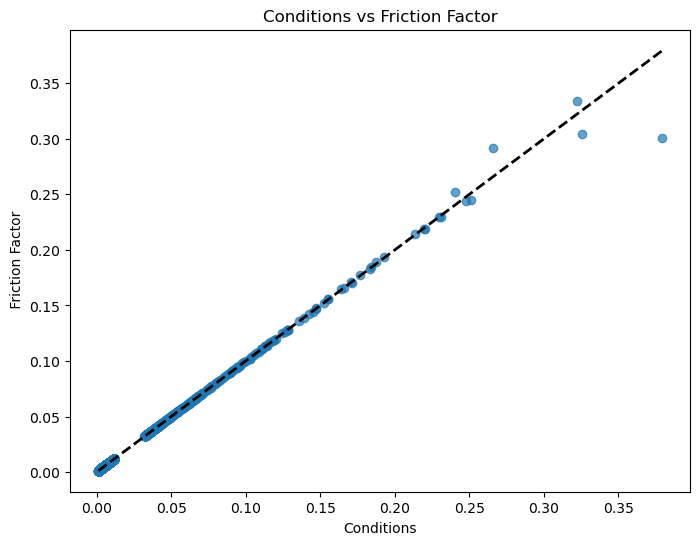

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.69)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Conditions')
plt.ylabel(' Friction Factor')
plt.title('Conditions vs Friction Factor')
plt.show()

In [8]:
z_i = (input("Enter list of features"))
z_i = np.array(z_i.split(',')).reshape(1, -1)
output = model.predict(z_i)
print(output)


Enter list of features5,6.8,23,55,98,5
[0.33119192]


C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


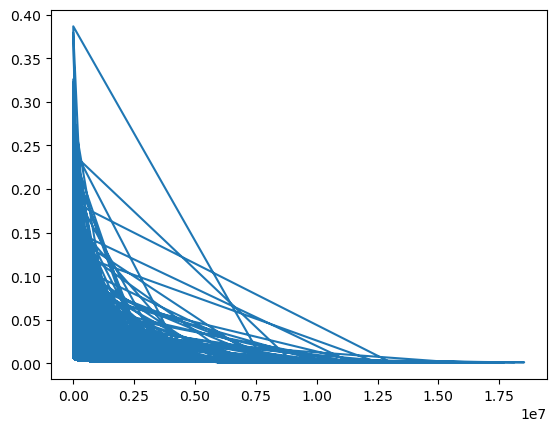

In [10]:
r= df['Reynolds Number']
f= df['Friction Factor']
plt.plot(r,f)
plt.show()

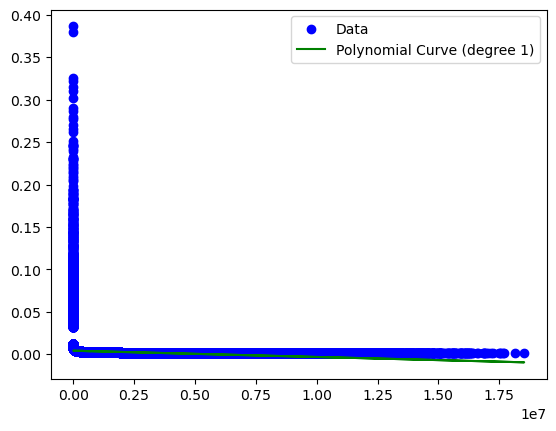

Text(0.5, 0.9, 'f = -0.00r + 0.00')

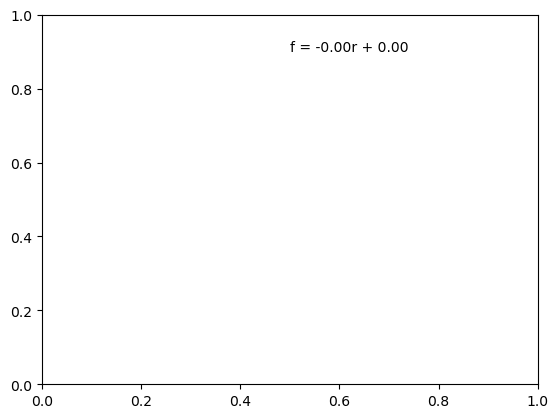

In [11]:
coefficients = np.polyfit(r,f, 1) 
curve = np.polyval(coefficients,r)
plt.scatter(r, f, label='Data', color='blue')
plt.plot(r, curve, label=f'Polynomial Curve (degree {1})', color='green')
plt.legend()
plt.show()
# Add equation to plot
plt.text(0.5, 0.9, f'f = {coefficients[0]:.2f}r + {coefficients[1]:.2f}', 
         transform=plt.gca().transAxes)
